---
title: "EURUSD"
date: today
date-format: "MMMM D, YYYY"

format:
  html:
    toc: true
    code-fold: true
    self-contained: true
    code-summary: "Show code"
    number-sections: true
    theme: flatly # cosmo
---

In [5]:
%run -i '../notes/2025_maschine_func.py'
EURUSD = pd.read_csv('/Users/fd/IB/processed/EURUSD.csv', parse_dates=["date"])
df = EURUSD.set_index('date').loc['2016',:]

Create daily statistics for:  
EURUSD, betsize 10000, every 10 pips, profit-taking 20 pips  
on  
daily, hourly, and minutely data

In [6]:
# “return the index label of the first occurrence of the maximum value.”
last_idx = df.index.to_series().groupby(df.index.date).idxmax()
# df_daily = df.groupby(df.index.date).last()
df_daily = df.loc[last_idx]

last_idx = df.index.to_series().groupby(df.index.floor("h")).idxmax()
df_hourly = df.loc[last_idx]

obj = MartingaleStrategy(df_daily, increment_position = 0.001, increment_profit = 0.002)
_ = obj.run() # adds (only) outstanding, realized_profit
summ_daily = obj.compute_daily_summary()

obj = MartingaleStrategy(df_hourly, increment_position = 0.001, increment_profit = 0.002)
_ = obj.run() # adds (only) outstanding, realized_profit
summ_hourly = obj.compute_daily_summary()

obj = MartingaleStrategy(df, increment_position = 0.001, increment_profit = 0.002)
_ = obj.run() # adds (only) outstanding, realized_profit
summ_minutely = obj.compute_daily_summary()

In [7]:
df_outstanding = pd.concat({'daily': summ_daily['outstanding'],
                            'hourly': summ_hourly['outstanding'],
                            'minutely': summ_minutely['outstanding']}, axis = 1)

df_unrealized = pd.concat({'daily': summ_daily['unrealized'],
                         'hourly': summ_hourly['unrealized'],
                         'minutely': summ_minutely['unrealized']}, axis = 1)

df_realized = pd.concat({'daily': summ_daily['realized'],
                         'hourly': summ_hourly['realized'],
                         'minutely': summ_minutely['realized']}, axis = 1)


df_realized = pd.concat({'daily': summ_daily['realized'],
                         'hourly': summ_hourly['realized'],
                         'minutely': summ_minutely['realized']}, axis = 1)

As one can see, the outstanding positions and unrealized pnl are almost identical across granularities. Because at any given level, the distance to the initializing level is approximately the same. 

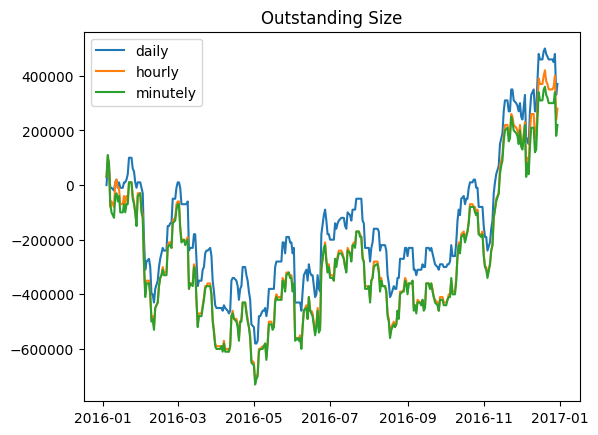

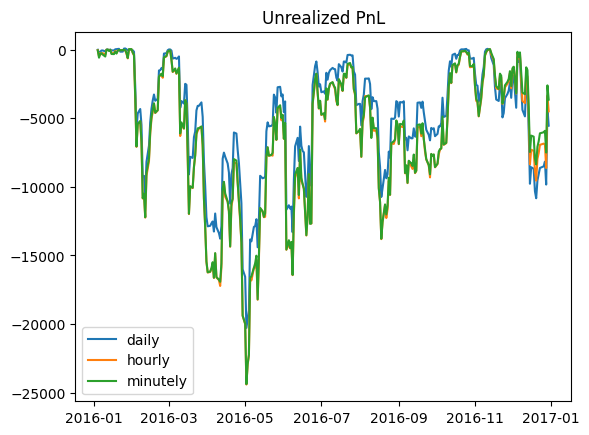

In [8]:
df_outstanding.plot(title = 'Outstanding Size')
df_unrealized.plot(title = 'Unrealized PnL');

However, big differences arise of course in the realized space (if there is enough "within day" back and forth). 

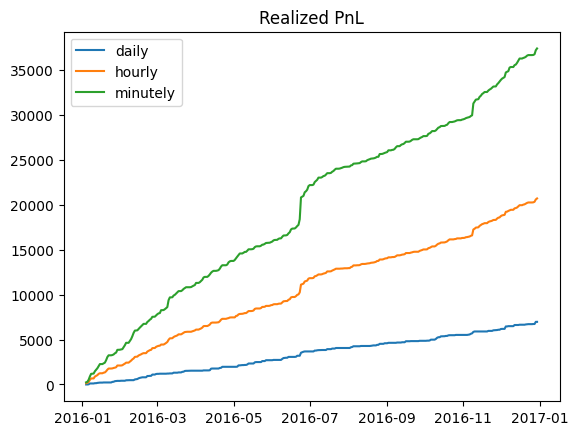

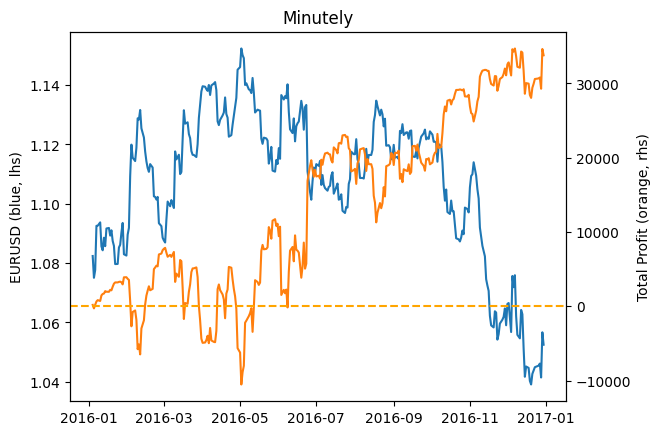

In [12]:
### FIG 1
df_realized.plot(title = 'Realized PnL')

### FIG 2
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # create second y-axis
summ_minutely['mid_close'].plot(ax=ax1, color="tab:blue", label="A")
summ_minutely['total'].plot(ax=ax2, color="tab:orange", label="B")
ax2.axhline(0, color = 'orange', linestyle = 'dashed');
ax1.set_ylabel("EURUSD (blue, lhs)")
ax2.set_ylabel("Total Profit (orange, rhs)");
plt.title('Minutely');